In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_validate, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
import warnings

## Import data

In [124]:
churn_df= pd.read_csv("../raw_data/churn_df.csv")

In [160]:
data_df = churn_df.sample(600000, random_state=42)


In [161]:
data_df = data_df.drop(['Unnamed: 0','msno'], axis=1)

In [162]:
scale_features = ['payment_method_id',
                  'payment_plan_days',
                  'plan_list_price',
                  'actual_amount_paid',
                  'remaining_plan_duration',
                  'num_25',
                  'num_50',
                  'num_75',
                  'num_985',
                  'num_100',
                  'num_unq',
                  'total_secs',
                  'city',
                  'bd',
                  'registered_via', 'usage_from_ltd']

## Pipeline start

In [163]:
# Build the pipeline with the different steps
num_pipeline = make_pipeline(SimpleImputer(strategy="mean"),StandardScaler())

preprocessor = ColumnTransformer([
    ('num_transformer', num_pipeline, scale_features)],
    remainder='passthrough'
)


In [164]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transformer',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['payment_method_id', 'payment_plan_days',
                                  'plan_list_price', 'actual_amount_paid',
                                  'remaining_plan_duration', 'num_25', 'num_50',
                                  'num_75', 'num_985', 'num_100', 'num_unq',
                                  'total_secs', 'city', 'bd', 'registered_via',
                                  'usage_from_ltd'])])

In [165]:
#create X and y
X = data_df.drop(['is_churn'], axis=1)
y= data_df['is_churn']

In [166]:
# Use fit on X_train and then transform both datasets
preprocessor.fit(X)
X_train_transformed = preprocessor.transform(X)

In [167]:
# Convert transformed data back to DataFrame to ensure column order is maintained
X_resampled = pd.DataFrame(
    X_train_transformed, 
    columns=preprocessor.get_feature_names_out()
)

# X_val_transformed = pd.DataFrame(
#     X_val_transformed, 
#     columns=preprocessor.get_feature_names_out()
# )


In [168]:
#SMOTE to balance data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y)

In [169]:
X_resampled['is_churn']=y_resampled

In [170]:
X_resampled

,num_transformer__payment_method_id,num_transformer__payment_plan_days,num_transformer__plan_list_price,num_transformer__actual_amount_paid,num_transformer__remaining_plan_duration,num_transformer__num_25,num_transformer__num_50,num_transformer__num_75,num_transformer__num_985,num_transformer__num_100,...,remainder__expire_month_sin,remainder__expire_month_cos,remainder__expire_day_sin,remainder__expire_day_cos,remainder__registration_year,remainder__registration_month_sin,remainder__registration_month_cos,remainder__registration_day_sin,remainder__registration_day_cos,is_churn
0,0.600385,-0.140845,-0.343953,-0.342548,-0.168220,-0.284844,-0.431234,-0.324007,-0.262892,-0.328158,...,8.660254e-01,-5.000000e-01,0.101168,-0.994869,2016.00000,-1.000000e+00,-1.836970e-16,-0.101168,-0.994869,0
1,0.600385,-0.140845,-0.343953,-0.342548,-0.168220,-0.319260,-0.196298,-0.457627,-0.197049,-0.554279,...,8.660254e-01,-5.000000e-01,-0.790776,-0.612106,2016.00000,8.660254e-01,5.000000e-01,-0.897805,-0.440394,0
2,0.600385,-0.140845,-0.343953,-0.342548,-0.168220,-0.456923,-0.509547,-0.324007,-0.328735,1.379371,...,8.660254e-01,-5.000000e-01,0.651372,-0.758758,2016.00000,8.660254e-01,5.000000e-01,0.485302,-0.874347,0
3,0.600385,-0.140845,-0.044420,-0.043175,-0.168220,-0.267636,-0.157142,-0.056767,-0.164127,-0.006940,...,8.660254e-01,-5.000000e-01,-0.485302,-0.874347,2014.00000,5.000000e-01,8.660254e-01,-0.988468,0.151428,0
4,0.600385,-0.140845,-0.343953,-0.342548,-0.168220,-0.267636,-0.274610,-0.190387,-0.197049,-0.528920,...,8.660254e-01,-5.000000e-01,0.790776,-0.612106,2016.00000,-2.449294e-16,1.000000e+00,0.790776,-0.612106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120895,-0.387181,-0.140845,0.036367,0.037569,-0.155599,0.008031,0.076028,0.390523,-0.065363,0.566045,...,8.660254e-01,-5.000000e-01,0.497063,0.815367,2016.00000,-5.000000e-01,8.660254e-01,0.174867,-0.805349,1
1120896,-4.758449,1.611729,1.938486,1.938671,1.373074,-0.434258,-0.516231,-0.452737,-0.301434,-0.559433,...,1.224647e-16,-1.000000e+00,-0.797290,0.595308,2014.41464,-9.444488e-01,2.073201e-01,-0.785793,0.543620,1
1120897,-5.048766,-0.140845,-0.044420,-0.043175,-0.040345,-0.382373,-0.322441,-0.164382,-0.262892,-0.278527,...,8.660254e-01,-5.000000e-01,-0.162643,-0.356688,2008.00000,8.660254e-01,-5.000000e-01,-0.356647,-0.584991,1
1120898,0.600385,-0.140845,-0.343953,-0.342548,-0.860685,-0.503917,-0.520082,-0.591247,-0.328735,-0.397726,...,1.000000e+00,6.123234e-17,-0.394071,-0.901572,2016.00000,9.639543e-01,1.345244e-01,-0.683515,0.640680,1


In [171]:
data = X_resampled.sample(frac=1, random_state=42)

In [172]:
data

,num_transformer__payment_method_id,num_transformer__payment_plan_days,num_transformer__plan_list_price,num_transformer__actual_amount_paid,num_transformer__remaining_plan_duration,num_transformer__num_25,num_transformer__num_50,num_transformer__num_75,num_transformer__num_985,num_transformer__num_100,...,remainder__expire_month_sin,remainder__expire_month_cos,remainder__expire_day_sin,remainder__expire_day_cos,remainder__registration_year,remainder__registration_month_sin,remainder__registration_month_cos,remainder__registration_day_sin,remainder__registration_day_cos,is_churn
347412,0.600385,-0.140845,-0.044420,-0.043175,-0.168220,2.640496,5.833744,6.757855,3.128026,0.299485,...,0.866025,-0.500000,0.394356,0.918958,2016.0,-8.660254e-01,5.000000e-01,0.571268,0.820763,0
198376,0.600385,-0.140845,-0.343953,-0.342548,-0.168220,-0.439715,-0.548703,-0.390817,-0.197049,-0.543713,...,0.866025,-0.500000,-0.790776,-0.612106,2016.0,1.224647e-16,-1.000000e+00,-0.897805,-0.440394,0
551388,0.345202,-0.140845,-0.044420,-0.043175,-0.078869,-0.499943,-0.548703,-0.591247,-0.229970,-0.583865,...,0.866025,-0.500000,-0.988468,0.151428,2007.0,1.224647e-16,-1.000000e+00,0.101168,-0.994869,0
1061965,-6.230065,9.373130,9.774261,9.770256,8.503972,0.321249,0.101936,-0.175820,-0.143830,0.100329,...,0.500000,-0.866025,0.900089,-0.389255,2012.0,-5.000000e-01,-2.018566e-01,-0.271480,-0.200100,1
399794,0.600385,-0.140845,-0.343953,-0.342548,-0.168220,-0.474131,-0.509547,-0.591247,-0.295813,-0.545826,...,0.866025,-0.500000,-0.968077,-0.250653,2014.0,5.000000e-01,8.660254e-01,0.299363,-0.954139,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-0.165163,-0.140845,-0.044420,-0.043175,-0.190557,0.584154,0.234419,0.277283,-0.032441,-0.135850,...,0.866025,-0.500000,-0.790776,-0.612106,2016.0,5.000000e-01,8.660254e-01,0.201299,0.979530,0
259178,-0.675528,-0.140845,0.141290,0.142436,-0.190557,-0.129973,-0.274610,-0.457627,-0.328735,-0.512014,...,0.866025,-0.500000,0.988468,0.151428,2011.0,1.224647e-16,-1.000000e+00,0.101168,-0.994869,0
131932,0.600385,-0.140845,-0.343953,-0.342548,-0.168220,0.024898,-0.274610,-0.123577,0.132167,0.468548,...,0.866025,-0.500000,0.897805,-0.440394,2015.0,-8.660254e-01,5.000000e-01,0.790776,-0.612106,0
671155,-0.675528,-0.140845,0.141290,0.142436,0.256007,0.398749,0.292298,0.832459,0.485269,2.309821,...,0.866025,-0.500000,0.848644,0.528964,2016.0,-5.671459e-01,6.725582e-01,-0.988142,-0.119674,1


In [173]:
X_resampled = data.drop(['is_churn'], axis=1)
y_resampled = data['is_churn']

In [72]:
xgb_clas = XGBClassifier()

cv_results = cross_validate(xgb_clas, X_resampled, y_resampled, cv=5)

accuracy = cv_results['test_score'].mean()

warnings.filterwarnings('ignore', category=FutureWarning)

In [73]:
cv_results

{'fit_time': array([11.27334285, 11.12164617, 11.37281895, 11.83008885, 12.11634016]),
 'score_time': array([0.02370024, 0.02485991, 0.02235723, 0.02113605, 0.02417803]),
 'test_score': array([0.99144141, 0.99194066, 0.99140575, 0.9914056 , 0.99108464])}

In [74]:
accuracy

0.9914556111912048

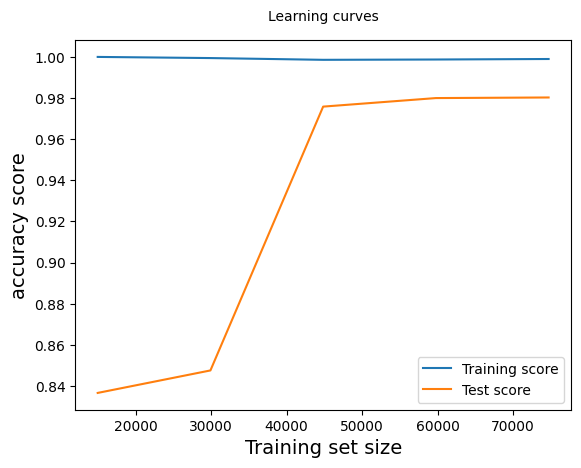

In [17]:
#learning curves

train_sizes = np.linspace(0.2,1,5)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=XGBClassifier(), 
    X=X_resampled, 
    y=y_resampled, 
    train_sizes=train_sizes,
    cv=5 
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=10, y=1.03)
#plt.ylim(0,1)
plt.legend()

warnings.filterwarnings('ignore', category=FutureWarning)

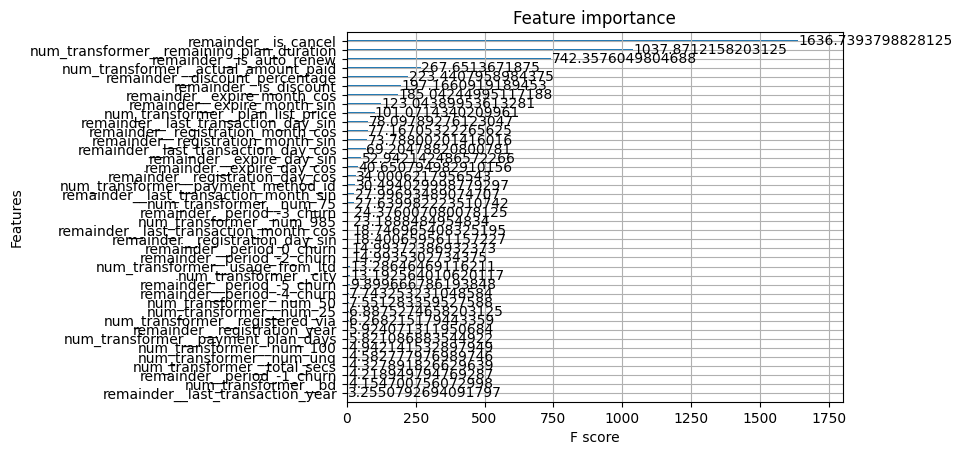

In [139]:
xgb_clas.fit(X_resampled, y_resampled)
plot_importance(xgb_clas, importance_type='gain')
plt.show()

In [174]:
importances = xgb_clas.feature_importances_
feature_names = X_resampled.columns

sorted_indices = np.argsort(importances)[::-1] 

top_15_features = feature_names[sorted_indices[:15]]

X_resampled_top_15 = X_resampled[top_15_features]



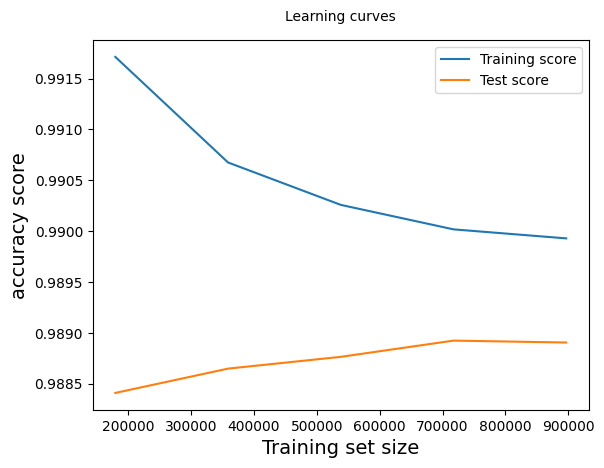

In [175]:
#learning curves with top 15 features

train_sizes = np.linspace(0.2,1,5)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=XGBClassifier(), 
    X=X_resampled_top_15, 
    y=y_resampled, 
    train_sizes=train_sizes,
    cv=5, 
    shuffle=True
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=10, y=1.03)
#plt.ylim(0,1)
plt.legend()

warnings.filterwarnings('ignore', category=FutureWarning)

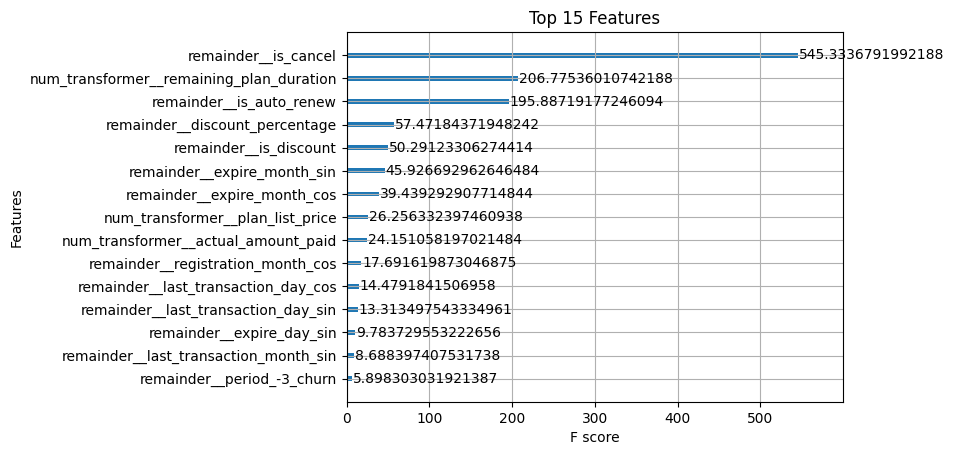

In [26]:
xgb_clas.fit(X_resampled_top_15, y_resampled)
plot_importance(xgb_clas, importance_type='gain',  max_num_features=15, title='Top 15 Features')
plt.show()

In [27]:
top_5_features = feature_names[sorted_indices[:5]]

X_resampled_top_5 = X_resampled[top_5_features]



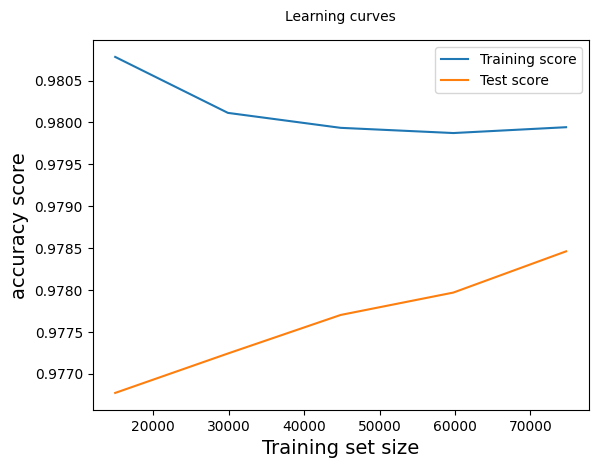

In [29]:
#learning curves with top 5 features

train_sizes = np.linspace(0.2,1,5)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=XGBClassifier(), 
    X=X_resampled_top_5, 
    y=y_resampled, 
    train_sizes=train_sizes,
    cv=5, 
    shuffle=True
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=10, y=1.03)
#plt.ylim(0,1)
plt.legend()

warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# Check for NaN values
#print(X.isnull().sum())
#print(y.isnull().sum())


# Check for Inf values
#print((X == np.inf).sum())
#print((y == -np.inf).sum())

In [ ]:
# #remove null and inf values
# X = X.fillna(0)
# X = X.replace([np.inf, -np.inf], 0)

# y = y.fillna(0)
# y = y.replace([np.inf, -np.inf], 0)

In [ ]:
# # Check for NaN values
# print(X.isnull().sum())
# print(y.isnull().sum())


# # Check for Inf values
# print((X == np.inf).sum())
# print((y == -np.inf).sum())

## Train_test_split and validation

In [ ]:
# # Split data into train, test and validation sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size = 0.3, random_state = 42  # TEST = 30%
# )

# # Use the same function above for the validation set
# X_test, X_val, y_test, y_val = train_test_split(
#     X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
# )

## SMOTE

In [ ]:
#Check results of SMOTE
print(y_resampled.value_counts('is_churn'))

In [ ]:
#new pipeline with SMOTE
# pipeline = make_imb_pipeline(
#     preprocessor,
#     SMOTE(random_state=42),
#           XGBRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_child_weight=10)
# )

In [ ]:
# Fit the combined pipeline on the training data
# pipeline.fit(X_train_transformed, y_train, xgbregressor__eval_set=[(X_train_transformed, y_train), (X_val_transformed, y_val)], xgbregressor__early_stopping_rounds=10)

## Random Search (to find coarse best hyperparameters)

In [ ]:
# # Define the hyperparameters and their distributions
# param_dist = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'n_estimators': np.arange(50, 1000, 50),
#     'max_depth': np.arange(3, 10, 1),
#     'min_child_weight': np.arange(1, 6, 1),
#     'subsample': np.linspace(0.5, 1, 6),
#     'colsample_bytree': np.linspace(0.5, 1, 6),
#     'gamma': np.linspace(0, 0.5, 6),
#     'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
# }

In [ ]:
# xgb = XGBRegressor(objective='reg:squarederror')  

# random_search = RandomizedSearchCV(
#     xgb, 
#     param_distributions=param_dist,
#     n_iter=50,  
#     scoring='neg_mean_squared_error',  
#     n_jobs=-1,  
#     cv=5,  
#     verbose=0  
)

In [ ]:
# random_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters and their corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

## Grid Search

In [ ]:
# # Define the parameter grid based on the coarse hyperparameters
# param_grid = {
#     'learning_rate': [0.02, 0.05, 0.07],
#     'n_estimators': [900, 950, 1000],
#     'max_depth': [4, 5, 6],
#     'min_child_weight': [2.5, 3, 3.5],
#     'gamma': [0.4, 0.5, 0.6],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.5, 0.6, 0.7],
#     'reg_alpha': [0.002, 0.005, 0.007]

# }

# # Initialize the model with other fixed parameters
# xgb_model = XGBRegressor(objective='reg:squarederror')

# # Set up GridSearchCV
# grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=0)

# # Fit the model with the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best hyperparameters:\n", best_params)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters:\n", best_params)